## IIT Guwahati Competition
## Employee Attrition Dataset

The aim is to predict employee attrition by using his/her past data as reference

#### Rank - 37/854 (Hosted on Kaggle) 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv(r'C:\Users\Parshiv\Downloads\CnA\train (2).csv')

In [4]:
data.head()


,Id,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,30,0,Non-Travel,Research & Development,2,3,Medical,571,3,...,3,0,12,2,11,7,6,7,4,1
1,2,36,0,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,...,3,2,7,2,3,2,1,1,2,1
2,3,55,1,Travel_Rarely,Sales,2,1,Medical,842,3,...,3,0,12,3,9,7,7,3,5,1
3,4,39,0,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,...,3,0,18,2,7,7,1,7,4,1
4,5,37,0,Travel_Rarely,Research & Development,3,3,Other,689,3,...,3,1,10,2,10,7,7,8,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Id                       1628 non-null   int64 
 1   Age                      1628 non-null   int64 
 2   Attrition                1628 non-null   int64 
 3   BusinessTravel           1628 non-null   object
 4   Department               1628 non-null   object
 5   DistanceFromHome         1628 non-null   int64 
 6   Education                1628 non-null   int64 
 7   EducationField           1628 non-null   object
 8   EmployeeNumber           1628 non-null   int64 
 9   EnvironmentSatisfaction  1628 non-null   int64 
 10  Gender                   1628 non-null   object
 11  JobInvolvement           1628 non-null   int64 
 12  JobRole                  1628 non-null   object
 13  JobSatisfaction          1628 non-null   int64 
 14  MaritalStatus            1628 non-null  

### The unique values in BusinessTravel, Department, EducationField and JobRole columns

In [6]:
print(data.BusinessTravel.unique())
print(data.Department.unique())
print(data.EducationField.unique())
print(data.JobRole.unique())

['Non-Travel' 'Travel_Rarely' 'Travel_Frequently']
['Research & Development' 'Sales' 'Human Resources']
['Medical' 'Life Sciences' 'Other' 'Marketing' 'Technical Degree'
 'Human Resources']
['Laboratory Technician' 'Manufacturing Director' 'Sales Executive'
 'Research Scientist' 'Sales Representative' 'Healthcare Representative'
 'Research Director' 'Human Resources' 'Manager']


### Labeling Different types of Data
- Age -> Ratio Data
- Business Travel -> Ordinal Data
- Department -> Nominal Data
- DistanceFromHome -> Ratio Data
- Education -> Ordinal Data
- EducationField -> Nominal Data
- EnvironmentSatidfaction -> Ordinal Data
- Gender -> Nominal Data
- JobInvolvement -> Ordinal Data
- JobRole -> Nominal Data
- JobSatisfaction- Ordinal Data
- MaritalStatus - Nominal Data
- MonthlyIncome - Ratio Data
- NumCompaniesWorked - Ordinal Data
- OverTime - Ratio Data
- PercentSalaryHike - Ratio Data
- StockOptionLevel - Ordinal Data
- TotalWorkingYears - Ratio Data
- TrainingTimesLastYear - Ordinal Data
- YearsAtCompany - Ratio Data
- YearsInCurrentRole - Ratio Data
- YearsSinceLastPromotion - Ratio Data
- CommunicationSkill - Ordinal Data
- Behaviour - Ordinal Data


In [7]:
df_job=data.loc[data.Attrition==0]
df_nojob=data.loc[data.Attrition==1]

### Some Visualizations to see if any patterns are visible 

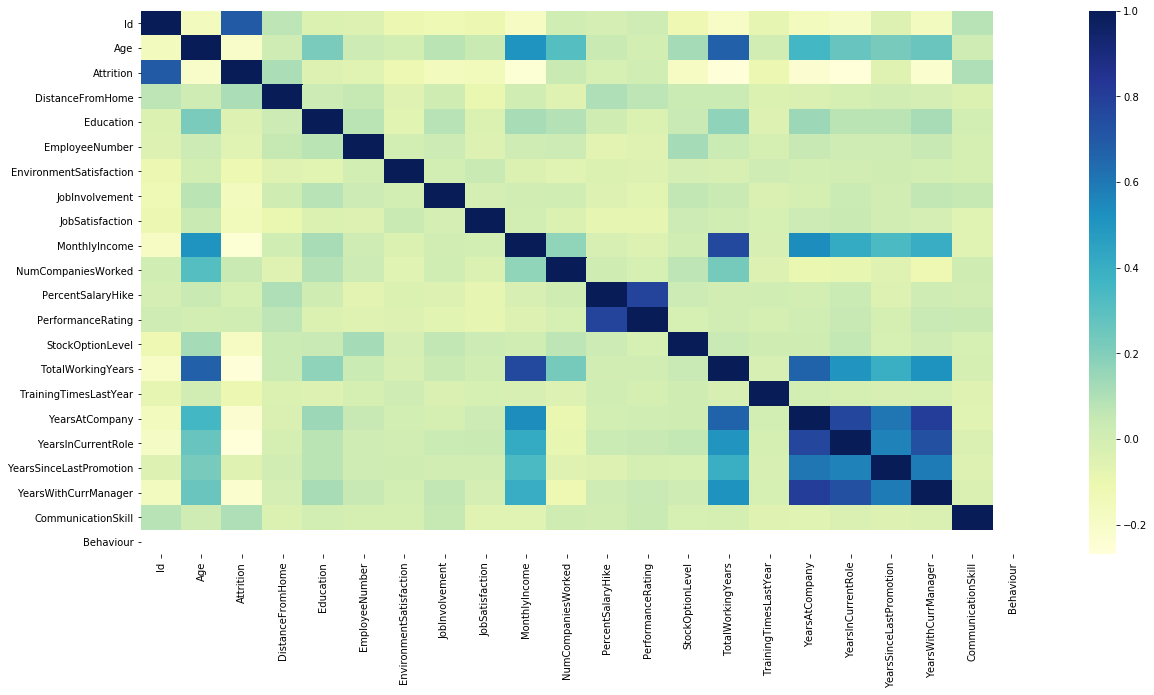

In [8]:
c=data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(c,cmap='YlGnBu')

Text(0.5, 1.0, 'Job Lost(Comm Skills)')

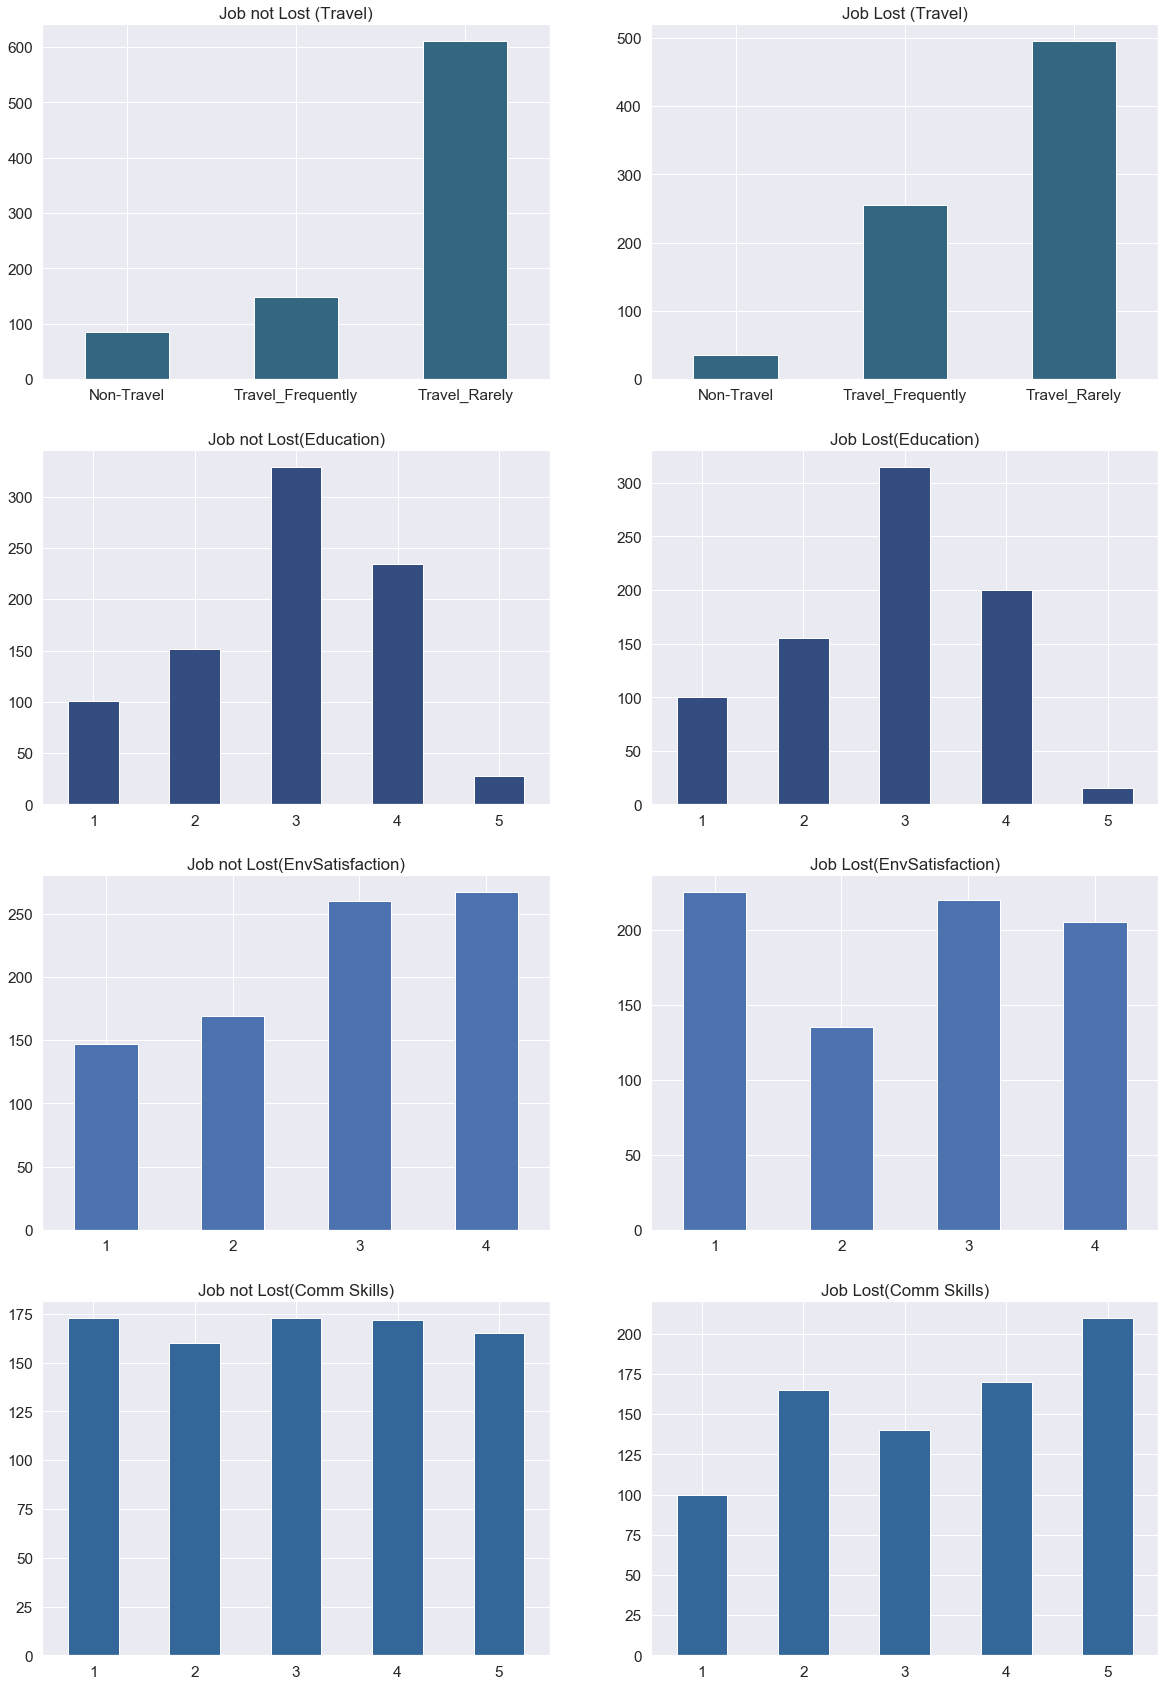

In [8]:
sns.set(font_scale=1.4)
fig,axs=plt.subplots(4,2,figsize=(20,30))
df_job.BusinessTravel.value_counts().sort_index().plot(kind='bar',ax=axs[0,0],color=(0.2, 0.4, 0.5),rot=0)
df_nojob.BusinessTravel.value_counts().sort_index().plot(kind='bar',ax=axs[0,1],color=(0.2, 0.4, 0.5),rot=0)
axs[0,0].set_title('Job not Lost (Travel)')
axs[0,1].set_title('Job Lost (Travel)')

df_job.Education.value_counts().sort_index().plot(kind='bar',color=(0.2, 0.3, 0.5),ax=axs[1,0],rot=0)
df_nojob.Education.value_counts().sort_index().plot(kind='bar',ax=axs[1,1],color=(0.2, 0.3, 0.5),rot=0)
axs[1,0].set_title('Job not Lost(Education)')
axs[1,1].set_title('Job Lost(Education)')

df_job.EnvironmentSatisfaction.value_counts().sort_index().plot(kind='bar',ax=axs[2,0],rot=0)
df_nojob.EnvironmentSatisfaction.value_counts().sort_index().plot(kind='bar',ax=axs[2,1],rot=0)
axs[2,0].set_title('Job not Lost(EnvSatisfaction)')
axs[2,1].set_title('Job Lost(EnvSatisfaction)')

df_job.CommunicationSkill.value_counts().sort_index().plot(kind='bar',ax=axs[3,0],color=(0.2, 0.4, 0.6),rot=0)
df_nojob.CommunicationSkill.value_counts().sort_index().plot(kind='bar',ax=axs[3,1],color=(0.2, 0.4, 0.6),rot=0)
axs[3,0].set_title('Job not Lost(Comm Skills)')
axs[3,1].set_title('Job Lost(Comm Skills)')



Text(0.5, 0, 'No. of Years')

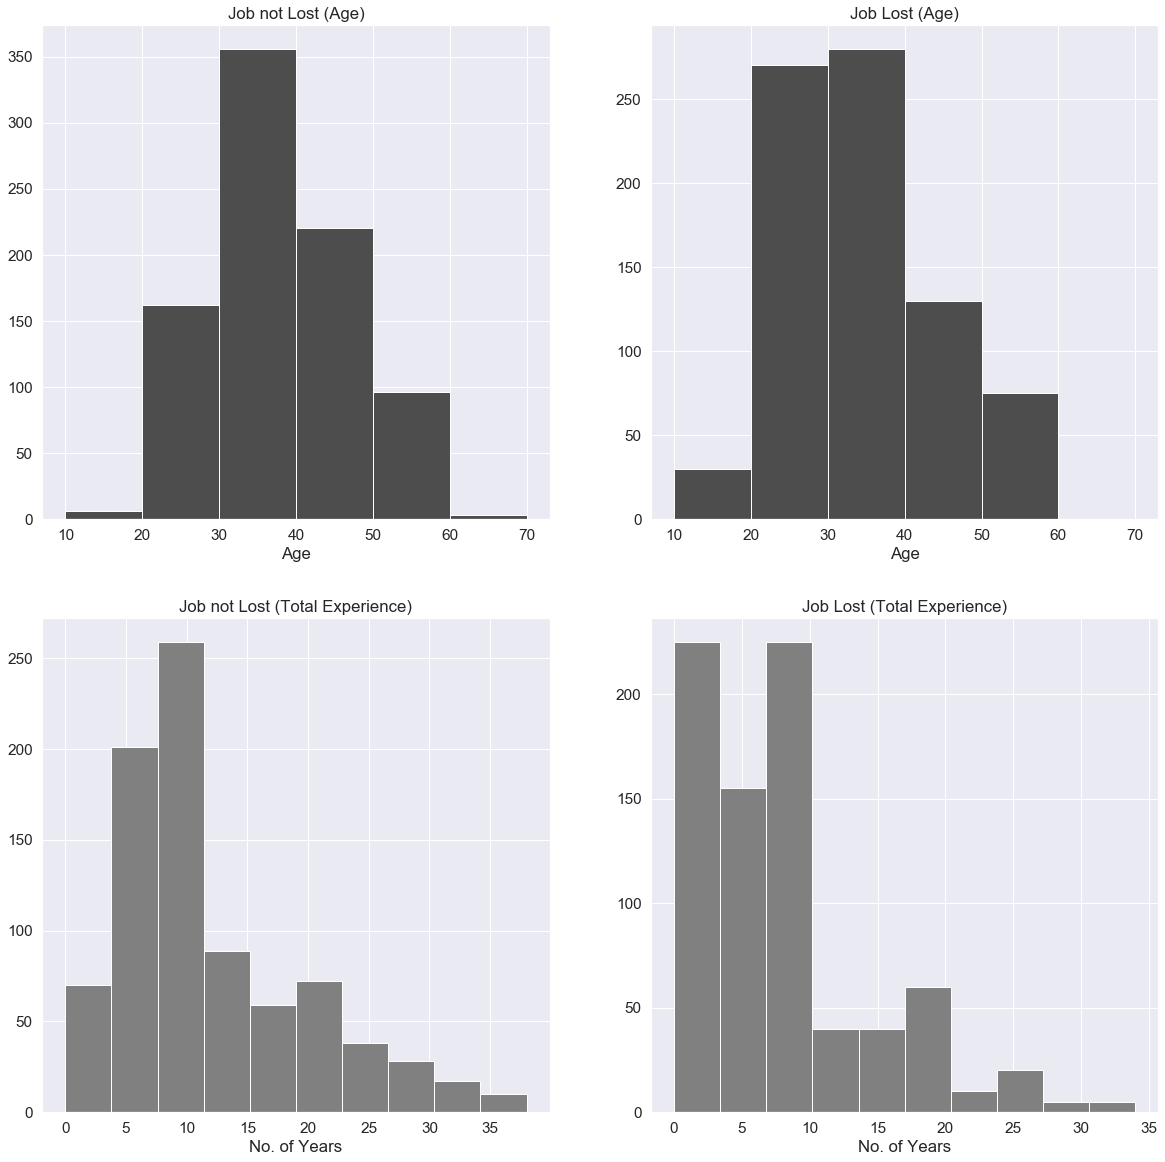

In [9]:
fig,axs=plt.subplots(2,2,figsize=(20,20))
bins=[10,20,30,40,50,60,70]
axs[0,0].hist(df_job.Age,bins=bins,color=('0.3'))
axs[0,1].hist(df_nojob.Age,bins=bins,color=('0.3'))
axs[0,0].set_title('Job not Lost (Age)')
axs[0,1].set_title('Job Lost (Age)')
axs[0,0].set_xlabel('Age')
axs[0,1].set_xlabel('Age')

axs[1,0].hist(df_job.TotalWorkingYears,color=('0.5'))
axs[1,1].hist(df_nojob.TotalWorkingYears,color=('0.5'))
axs[1,0].set_title('Job not Lost (Total Experience)')
axs[1,1].set_title('Job Lost (Total Experience)')
axs[1,0].set_xlabel('No. of Years')
axs[1,1].set_xlabel('No. of Years')

From the above histograms it is visible that the TotalWorkingYears data is right skewed.

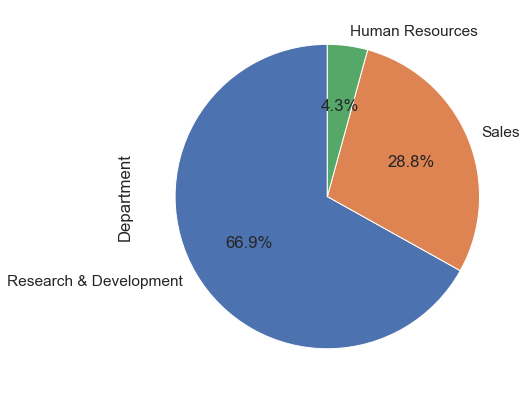

In [10]:

df_job['Department'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7),startangle=90)

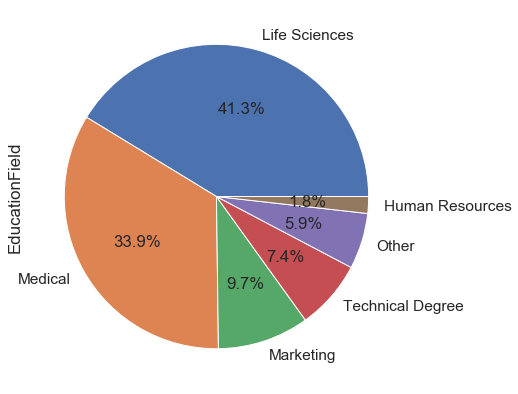

In [11]:
a=df_job['EducationField'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))




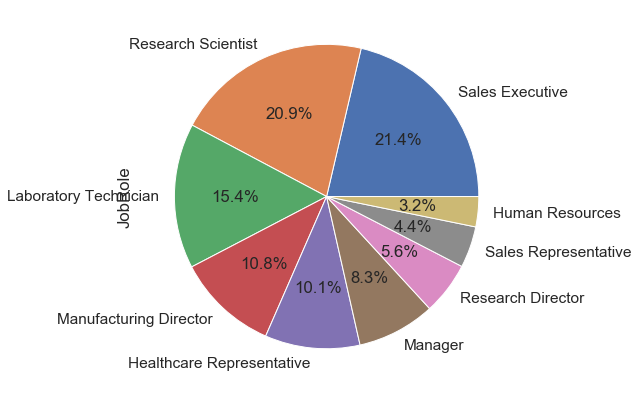

In [12]:
b=df_job['JobRole'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))

### One hot encoding EducationField, JobRole and Department columns

In [9]:
df_enc=pd.get_dummies(data,columns=['EducationField','JobRole','Department'],drop_first=True)

In [10]:
df_enc.head()

,Id,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales
0,1,30,0,Non-Travel,2,3,571,3,Female,3,...,0,1,0,0,0,0,0,0,1,0
1,2,36,0,Travel_Rarely,12,4,1614,3,Female,3,...,0,0,0,1,0,0,0,0,1,0
2,3,55,1,Travel_Rarely,2,1,842,3,Male,3,...,0,0,0,0,0,0,1,0,0,1
3,4,39,0,Travel_Rarely,24,1,2014,1,Male,3,...,0,0,0,0,0,1,0,0,1,0
4,5,37,0,Travel_Rarely,3,3,689,3,Male,3,...,0,0,0,1,0,0,0,0,1,0


### Label Encoding BusinessTravel, Gender, MaritalStatus and Overtime

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc=LabelEncoder()
df_enc.BusinessTravel=enc.fit_transform(df_enc.BusinessTravel)
df_enc.Gender=enc.fit_transform(df_enc.Gender)
df_enc.MaritalStatus=enc.fit_transform(df_enc.MaritalStatus)
df_enc.OverTime=enc.fit_transform(df_enc.OverTime)

In [13]:
df_enc.head()

,Id,Age,Attrition,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales
0,1,30,0,0,2,3,571,3,0,3,...,0,1,0,0,0,0,0,0,1,0
1,2,36,0,2,12,4,1614,3,0,3,...,0,0,0,1,0,0,0,0,1,0
2,3,55,1,2,2,1,842,3,1,3,...,0,0,0,0,0,0,1,0,0,1
3,4,39,0,2,24,1,2014,1,1,3,...,0,0,0,0,0,1,0,0,1,0
4,5,37,0,2,3,3,689,3,1,3,...,0,0,0,1,0,0,0,0,1,0


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_data=df_enc.drop(['Attrition','Id'],axis=1)
y=df_enc['Attrition']

In [16]:
train_data.shape

(1628, 39)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.3,random_state=1)

### Importing Test Data

In [18]:
test_data=pd.read_csv(r'C:\Users\Parshiv\Downloads\CnA\test (1).csv')
test_data.head()

,Id,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,1,28,Travel_Rarely,Research & Development,9,3,Medical,377,4,Male,...,4,1,5,3,5,2,0,4,5,1
1,2,31,Travel_Rarely,Sales,6,4,Medical,653,1,Male,...,4,2,13,4,7,7,5,7,3,1
2,3,37,Travel_Rarely,Research & Development,6,3,Medical,474,3,Male,...,3,2,13,2,7,7,6,7,4,1
3,4,42,Travel_Rarely,Research & Development,1,2,Life Sciences,827,4,Female,...,3,1,8,4,4,3,0,2,5,1
4,5,45,Non-Travel,Research & Development,4,2,Life Sciences,972,3,Male,...,3,0,9,5,9,7,0,8,2,1


In [19]:
#Making the same changes as training data
test_df_enc=pd.get_dummies(test_data,columns=['EducationField','JobRole','Department'],drop_first=True)


In [20]:
test_df_enc.BusinessTravel=enc.fit_transform(test_df_enc.BusinessTravel)
test_df_enc.Gender=enc.fit_transform(test_df_enc.Gender)
test_df_enc.MaritalStatus=enc.fit_transform(test_df_enc.MaritalStatus)
test_df_enc.OverTime=enc.fit_transform(test_df_enc.OverTime)

In [21]:
test_df_enc.shape
test_df_2=test_df_enc.drop(['Id'],axis=1)

In [22]:
test_df_2.head()

,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales
0,28,2,9,3,377,4,1,3,4,1,...,0,0,0,0,0,1,0,0,1,0
1,31,2,6,4,653,1,1,4,4,0,...,0,0,0,0,0,0,1,0,0,1
2,37,2,6,3,474,3,1,4,1,0,...,0,0,0,0,0,1,0,0,1,0
3,42,2,1,2,827,4,0,2,4,1,...,0,0,0,1,0,0,0,0,1,0
4,45,0,4,2,972,3,1,3,2,1,...,0,1,0,0,0,0,0,0,1,0


### Building a Machine Learning Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

### 1. Random Forest Classifier

In [62]:
rfc=RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=8,random_state=1)

In [25]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [26]:
rfc_prob=rfc.predict_proba(X_test)

In [27]:
rfc_prob = rfc_prob[:,1]
rfc_auc=roc_auc_score(y_test,rfc_prob)

In [28]:
rfc_auc

0.9911171333935561

In [29]:
imp=rfc.feature_importances_

In [30]:
ft_imp=pd.DataFrame(columns=['Feature','Importance'])
ft_imp.Feature=train_data.columns
ft_imp.Importance=imp

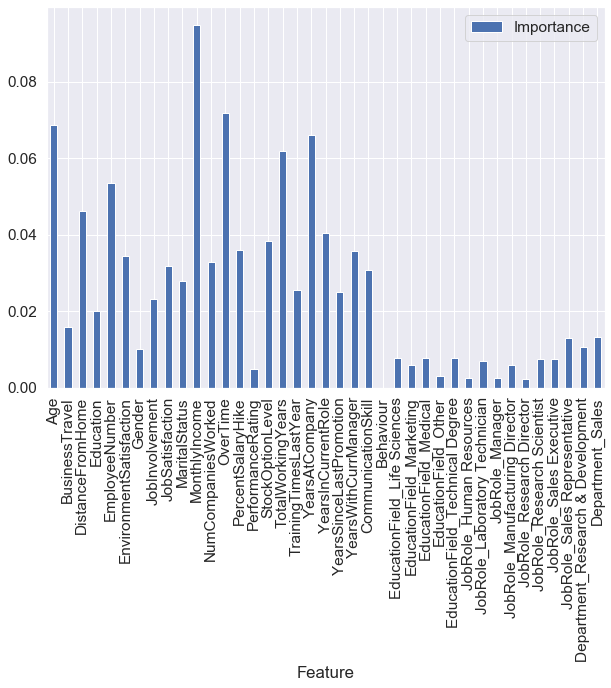

In [58]:
ft_imp.plot(x='Feature',kind='bar',figsize=(10,7))

### Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [65]:
lr=LogisticRegression(solver='lbfgs',max_iter=3500,random_state=42,C=0.7)

In [141]:
lr.fit(X_train,y_train)

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
lr_prob=lr.predict_proba(X_test)
lr_prob=lr_prob[:,1]
lr_auc=roc_auc_score(y_test,lr_prob)
lr_auc

0.8440563417979858

In [102]:
#Using Logistic Regression for final Submission
lr_test_prob=lr.predict_proba(test_df_enc)
lr_test_prob=lr_test_prob[:,1]


In [103]:
final_sub_lr2=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr2['Id']=test_df_enc['Id']
final_sub_lr2['Attrition']=lr_test_prob
final_sub_lr2.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr2.csv',index=False)

### Linear SVC 

In [70]:
from sklearn.svm import LinearSVC

In [73]:
#Since n_samples > n_features dual is set to False
lsvc=LinearSVC(C=1.0,dual=False,random_state=1,max_iter=1000)

In [74]:
lsvc.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

### KNN

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn=KNeighborsClassifier(n_neighbors=2,p=2)

In [77]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [78]:
knn_prob=knn.predict_proba(X_test)
knn_prob=knn_prob[:,1]
knn_auc=roc_auc_score(y_test,lr_prob)
knn_auc

0.8430693566194922

In [99]:
#Using KNN for final submission
final_sub_knn=knn.predict_proba(test_df_enc)

In [100]:
knn_test_prob=final_sub_knn[:,1]

In [101]:
final_sub_knn=pd.DataFrame(columns=['Id','Attrition'])
final_sub_knn['Id']=test_df_enc['Id']
final_sub_knn['Attrition']=knn_test_prob
final_sub_knn.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_knn.csv',index=False)

In [104]:
# Using the Random Forest Classifier for final submission
sub_prob=rfc.predict_proba(test_df_enc)

In [105]:
sub_prob=sub_prob[:,1]
final_sub=pd.DataFrame(columns=['Id','Attrition'])
final_sub['Id']=test_df_enc['Id']
final_sub['Attrition']=sub_prob

In [106]:
final_sub.head()

,Id,Attrition
0,1,0.252253
1,2,0.149639
2,3,0.169550
3,4,0.213313
4,5,0.123252


In [45]:
final_sub.shape

(470, 2)

In [108]:
final_sub.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_rfc.csv',index=False)

In [86]:
lr2=LogisticRegression(solver='lbfgs',max_iter=3500,random_state=1,C=1.0)

In [87]:
#Since Logistic Regression gave the best results on the Kaggle Leaderboard we will try using the dataset to train the model and check if the result improves
lr2.fit(train_data,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
final_sub_lr2=lr2.predict_proba(test_df_enc)
lr2_test_prob=final_sub_lr2[:,1]
final_sub_lr2=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr2['Id']=test_df_enc['Id']
final_sub_lr2['Attrition']=lr2_test_prob
final_sub_lr2.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr2.csv',index=False)

In [62]:
final_sub_rfc2=rfc.predict_proba(test_df_2)
rfc2_test_prob=final_sub_rfc2[:,1]
final_sub_rfc2=pd.DataFrame(columns=['Id','Attrition'])
final_sub_rfc2['Id']=test_df_enc['Id']
final_sub_rfc2['Attrition']=rfc2_test_prob
final_sub_rfc2.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_rfc2.csv',index=False)

In [69]:
#Best Result
final_sub_lr3=lr.predict_proba(test_df_2)
lr3_test_prob=final_sub_lr3[:,1]
final_sub_lr3=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr3['Id']=test_df_enc['Id']
final_sub_lr3['Attrition']=lr3_test_prob
final_sub_lr3.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr3.csv',index=False)

In [80]:
final_sub_knn2=knn.predict_proba(test_df_2)
knn2_test_prob=final_sub_knn2[:,1]
final_sub_knn2=pd.DataFrame(columns=['Id','Attrition'])
final_sub_knn2['Id']=test_df_enc['Id']
final_sub_knn2['Attrition']=knn2_test_prob
final_sub_knn2.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_knn2.csv',index=False)

In [85]:
final_sub_lr5=lr2.predict_proba(test_df_2)
lr5_test_prob=final_sub_lr5[:,1]
final_sub_lr5=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr5['Id']=test_df_enc['Id']
final_sub_lr5['Attrition']=lr5_test_prob
final_sub_lr5.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr5.csv',index=False)

In [88]:
final_sub_lr6=lr2.predict_proba(test_df_2)
lr6_test_prob=final_sub_lr6[:,1]
final_sub_lr6=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr6['Id']=test_df_enc['Id']
final_sub_lr6['Attrition']=lr6_test_prob
final_sub_lr6.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr6.csv',index=False)

In [144]:
final_sub_lr7=lr.predict_proba(test_df_2)
lr7_test_prob=final_sub_lr7[:,1]
final_sub_lr7=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr7['Id']=test_df_enc['Id']
final_sub_lr7['Attrition']=lr7_test_prob
final_sub_lr7.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr.csv',index=False)

In [56]:
test_df_3=test_df_2.drop(['MaritalStatus'],axis=1)
test_df_3.head()

,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales
0,28,2,9,3,377,4,1,3,4,2070,...,0,0,0,0,0,1,0,0,1,0
1,31,2,6,4,653,1,1,4,4,5460,...,0,0,0,0,0,0,1,0,0,1
2,37,2,6,3,474,3,1,4,1,5974,...,0,0,0,0,0,1,0,0,1,0
3,42,2,1,2,827,4,0,2,4,6062,...,0,0,0,1,0,0,0,0,1,0
4,45,0,4,2,972,3,1,3,2,4447,...,0,1,0,0,0,0,0,0,1,0


In [31]:
train_data.head()

,Age,BusinessTravel,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobSatisfaction,MaritalStatus,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Department_Research & Development,Department_Sales
0,30,0,2,3,571,3,0,3,4,2,...,0,1,0,0,0,0,0,0,1,0
1,36,2,12,4,1614,3,0,3,3,1,...,0,0,0,1,0,0,0,0,1,0
2,55,2,2,1,842,3,1,3,4,2,...,0,0,0,0,0,0,1,0,0,1
3,39,2,24,1,2014,1,1,3,4,2,...,0,0,0,0,0,1,0,0,1,0
4,37,2,3,3,689,3,1,3,3,1,...,0,0,0,1,0,0,0,0,1,0


In [32]:
train_data_2=train_data.drop(['MaritalStatus'],axis=1)

In [58]:
x2_train, x2_test, y2_train, y2_test=train_test_split(train_data_2, y, test_size=0.3,random_state=42)

In [66]:
lr.fit(x2_train,y2_train)

LogisticRegression(C=0.7, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
lr_prob=lr.predict_proba(x2_test)
lr_prob=lr_prob[:,1]
lr_auc=roc_auc_score(y2_test,lr_prob)
lr_auc

0.8562259091670856

In [61]:
final_sub_lr8=lr.predict_proba(test_df_3)
lr8_test_prob=final_sub_lr8[:,1]
final_sub_lr8=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr8['Id']=test_df_enc['Id']
final_sub_lr8['Attrition']=lr8_test_prob
final_sub_lr8.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr8.csv',index=False)

In [63]:
rfc.fit(x2_train,y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [70]:
rfc_prob=rfc.predict_proba(x2_test)
rfc_prob = rfc_prob[:,1]
rfc_auc=roc_auc_score(y2_test,rfc_prob)
rfc_auc

0.9854700854700854

In [72]:
final_sub_rfc3=rfc.predict_proba(test_df_3)
rfc3_test_prob=final_sub_rfc3[:,1]
final_sub_rfc3=pd.DataFrame(columns=['Id','Attrition'])
final_sub_rfc3['Id']=test_df_enc['Id']
final_sub_rfc3['Attrition']=rfc3_test_prob
final_sub_rfc3.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_rfc3.csv',index=False)

### Normalizing salary column

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
mms=MinMaxScaler()
train_data['MonthlyIncome']=mms.fit_transform(train_data_2[['MonthlyIncome']])

In [94]:
test_df_2['MonthlyIncome']=mms.fit_transform(test_df_2[['MonthlyIncome']])

In [87]:
train_data_2['MonthlyIncome']=mms.fit_transform(train_data_2[['MonthlyIncome']])

In [91]:
x3_train, x3_test, y3_train, y3_test=train_test_split(train_data, y, test_size=0.3,random_state=42)

In [119]:
lr=LogisticRegression(solver='lbfgs',max_iter=3500,random_state=42,C=1)

In [120]:
lr.fit(x3_train,y3_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
lr_prob=lr.predict_proba(x3_test)
lr_prob=lr_prob[:,1]
lr_auc=roc_auc_score(y3_test,lr_prob)
lr_auc

0.8619406737053795

In [95]:
final_sub_lr9=lr.predict_proba(test_df_2)
lr9_test_prob=final_sub_lr9[:,1]
final_sub_lr9=pd.DataFrame(columns=['Id','Attrition'])
final_sub_lr9['Id']=test_df_enc['Id']
final_sub_lr9['Attrition']=lr9_test_prob
final_sub_lr9.to_csv(r'C:\Users\Parshiv\Downloads\CnA\final_sub_lr9.csv',index=False)

In [96]:
train_data_3=train_data_2

In [123]:
features=['MonthlyIncome','Gender']
train_df_3=train_data_2[features]

In [124]:
train_df_3

,MonthlyIncome,Gender
0,0.081885,0
1,0.192417,0
2,0.218589,1
3,0.163191,1
4,0.443655,1
...,...,...
1623,0.092154,1
1624,0.218589,1
1625,0.178568,1
1626,0.069826,1


In [125]:
from sklearn.naive_bayes import GaussianNB

In [126]:
nb=GaussianNB()

In [127]:
nb.fit(x3_train,y3_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [128]:
nb_prob=nb.predict_proba(x3_test)
nb_prob=nb_prob[:,1]
nb_auc=roc_auc_score(y3_test,nb_prob)
nb_auc

0.7427182838947545